# Data Visualization II

![](images/look_at_this_graph.gif)

## Seaborn 

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics.

Some advantages of using seaborn over matplotlib:

- it uses fewer syntax 
- it has easily interesting default themes
- it specializes in statistics visualization
- it is more integrated with pandas
- works with dataframes on the whole and is more intuitive than matplotlib

#### Let's use Seaborn to recreate some of the graphs we made yesterday with the weight-height dataset.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('./data/weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Let's start with a scatterplot of height and weight!

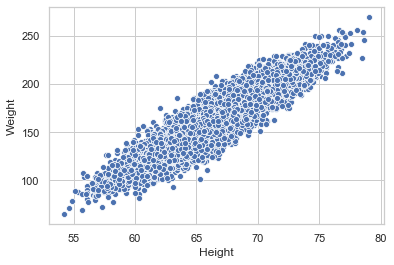

In [3]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Height', y='Weight', ax=ax)
plt.show()

### Now we can adjust so that the males and females have different colored dots

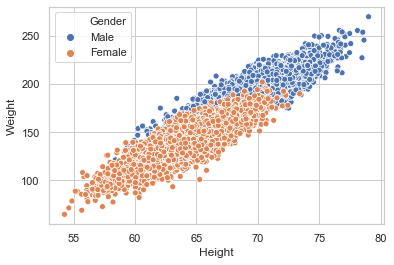

In [4]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Height', y='Weight', ax=ax, hue='Gender')
plt.show()

### Great!  But now we should add a title!

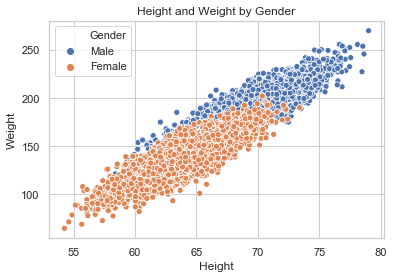

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Height', y='Weight', ax=ax, hue='Gender')
ax.set_title("Height and Weight by Gender")
plt.show()

### Your Turn!

Create a histogram of weight using `.distplot()` and tweak the graph so that:
- the kernel density estimate (KDE) is not displayed
- the plot is purple
- you have 25 bins
- you have x and y axis labels 
- your graph has a title


In [6]:
#your code here

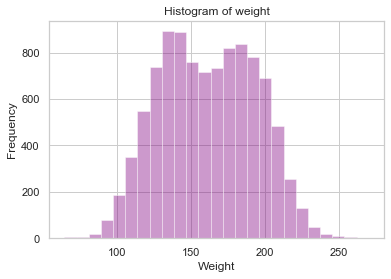

In [7]:
#SOLUTION
fig, ax=plt.subplots()
sns.distplot(data['Weight'], kde= False, color='purple', bins=25, ax=ax)
ax.set_ylabel('Frequency')
ax.set_title('Histogram of weight')
plt.show()

## Pandas Plotting


Pandas also has some plotting capabilities the sit on top of matplotlib just like seaborn does.  These methods can simplify the process of creating data visualiations from a pandas dataframe or series. [See documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for more specifics.

Advantages of using pandas built in plotting:
- helpful when you have a meaningful index
- can use when you have a `.value_counts()` or a `.groupby()` statement

#### Let's start with a box plot of heights in pandas!

Check out [`.plot` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for how we create a box plot.

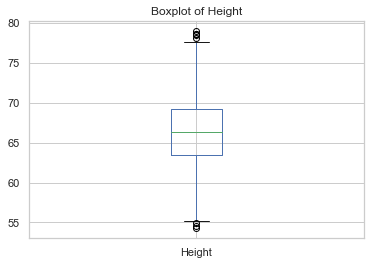

In [8]:
data.Height.plot(kind='box', title="Boxplot of Height")

#### Now what if we wanted to create one boxplot based on gender?

 Here we need to use the `.boxplot()` function and the `by` argument.

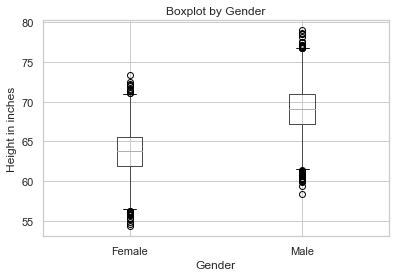

In [9]:
fig, ax = plt.subplots()
data.boxplot(column=['Height'], by=['Gender'], ax=ax)
ax.set_ylabel('Height in inches')
ax.set_xlabel("Gender")
ax.set_title('Boxplot by Gender')
fig.suptitle("") # takes off the title automatically added by boxplot
plt.show()

### Your Turn!

Create a bar char of average weight by gender using a `.groupby` and `.plot()` and tweak the graph so that:
- the bars are in red
- you have x and y axis labels 
- your graph has a title


In [10]:
#your code here

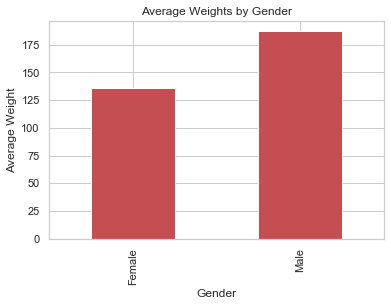

In [11]:
#SOLUTION
fig, ax=plt.subplots()
data.groupby('Gender').Weight.mean().plot(kind='bar', color = 'r')
ax.set_ylabel('Average Weight')
ax.set_title('Average Weights by Gender')
plt.show()

## Things to avoid

<img src="https://media.giphy.com/media/10NNJitHXAZnqw/giphy.gif" width=300 />

### The Pie chart!

<img src="http://25.media.tumblr.com/tumblr_m5fvbaESL71r5mnvxo1_250.gif" width=600 />

Pie charts are something to avoid for the following reasons:
- The human eye is bad at giving quantitative value to two-dimensional space
- They are hard from people to read
- when segments are close in size it is difficult to tell which is bigger

###  Donut Charts

![](https://www.amcharts.com/wp-content/uploads/2013/11/demo_129_none.png)

Donut charts basically have all the same negatives of the pie chart and add an additional challenge - the audience now has to compare arc lengths!

### 3D

![](https://i.stack.imgur.com/2cFRH.png)

3D should be avoided in charts unless you are actually plotting a 3rd dimension.  3D is bad because:
- 3D skews our numbers, making them more difficult to compare
- It adds unnecessary chart elements that can be distracting
- The heights of bars are often hard to determine

### Secondary y-axis 

![](https://i.stack.imgur.com/G3fc4.png)

A secondary y-axis is used to compare two variables that are on different scales on the same graph.

- The secondary axis makes it more difficult to read
- You have to work hard to figure out which axis goes with which data

Instead of using a secondary axis, pull the graphs apart vertically to use the same x-axis


## Elements of your graph you CAN adjust

And in many cases you probably should!

### Shape of data points

It is often helpful to change the shape of data points to better distinguish points within groups.  This is particularly useful when you can't use color.

![](https://seaborn.pydata.org/_images/scatterplot_7_0.png)
![](https://seaborn.pydata.org/_images/seaborn-boxplot-5.png)

### Color

#### Tips for using color:
- use it sparingly
    - don't add color for the sake of it!
- think about using brand colors
- be consistent
    - if you start with one color scheme stick with it throughout your presentation
- start with black and white
- use less intense colors 
    - not all the colors of the rainbow (NEVER USE SEABORN'S Rainbow default colors!!)
    - easier on the eyes
- communicate with color
    - highlight interesting groups
    - highlight your message (use gray for all data and then use a bold color to draw attention)
    - show a continuum of values of one color scale vs a gradients that are like a rainbow
    
![](https://www.dataquest.io/wp-content/uploads/2019/01/full-180529_considercolor16.png)

![](https://upload.wikimedia.org/wikipedia/en/timeline/15833eb5fd215305b5408fa1b9db622f.png)

![](./images/rainbow.png)

### Be Considerate of Color blindness

8% of men and half a percent of women are colorblind

They will have trouble distinquishing between red and green

Stay away from these color combinations

<img src='https://cdns.tblsft.com/sites/default/files/blog/color2.png'/>

https://www.tableau.com/about/blog/2016/4/examining-data-viz-rules-dont-use-red-green-together-53463

## Saving your figures

Finally you have the perfect figure for your presentation or readme file.  How do you get it there?  Should you take a screenshot?

###  NO screenshots!  Save the plot!

When we take a screenshot we will often have a resulting graph with poor resolution.  Instead we can use the `plt.savefig()` method to save out figures.

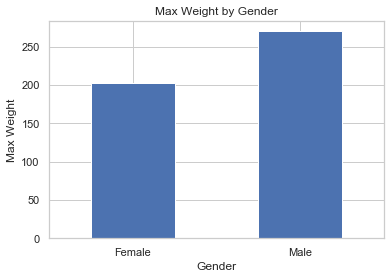

In [12]:
fig, ax = plt.subplots()
data.groupby('Gender').Weight.max().plot(kind='bar', rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('Max Weight')
ax.set_title('Max Weight by Gender')
fig.savefig('My_plot.png')


## Your turn!  

Create a visualization of your choice using the `car_insurance.csv` dataset.  Save out the figure you created!

In [13]:
#your code here

## Formatting special values

There are times in which you may want to format your tick marks so that they read as dollars or percentages.  You can use the [`matplotlib.ticker` module](https://matplotlib.org/3.1.1/gallery/pyplots/dollar_ticks.html) to format your tick marks to go above and beyond for your audence!

![](https://matplotlib.org/3.1.1/_images/sphx_glr_dollar_ticks_001.png)

![](https://media.giphy.com/media/3o6MbrACMlFCny8zmw/giphy.gif)